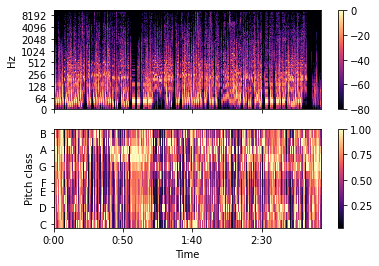

In [40]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
path = "/content/drive/Shareddrives/G-33-2022/Audios/Fully mixed song for us to separate and listen/Billie Eilish - bury a friend.wav"
name ="Billie Eilish - bury a friend" 

y, sr = librosa.load(path)

S = np.abs(librosa.stft(y))
chroma = librosa.feature.chroma_stft(S=S, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                               y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].label_outer()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])

In [52]:
print(sr)
print(y.shape)
print(S.shape)
print(len(S[0,:]))

#song duration = 4258810/22050  = 193.14 seconds
#stft sampling per second = 8318/193.14 = 43 samples per second

22050
(4258810,)
(1025, 8318)
8318


In [42]:
onset_signal = []
for i in range( len(S[0,:])-1):
  current = S[:,i]
  next = S[:,i+1]
  diff = np.array(next-current)
  onset_signal.append( np.sum(np.where(diff<0,0,diff)) )

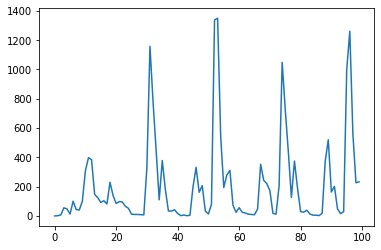

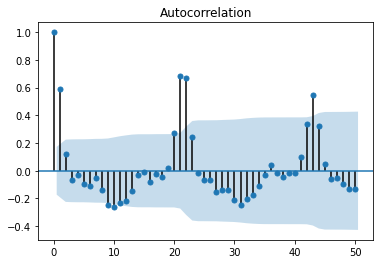

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
plt.plot(onset_signal[0:100])
plot_acf(onset_signal[0:43*3], lags=50)
plt.show()

From the autocorrelation graph we can see that 22 shift gives a higher correlation. Lets assum that 22 is the number of samples that have to be shifted to signal to become period.Since we have 43 samples per second, 22 samples occupy 22/43= 0.511 seconds which is equal to the actual time per one beat.

In [49]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)  #inbuilt librosa function
print(tempo)
#real bpm is 122.time per one beat = 0.49 seconds. the time signature is 4/4. Bar time = 1.96 seconds

123.046875
